### Guided Practice: Logit Function and Odds

In [11]:
import numpy as np 
# calc log odds 
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds) #None


def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1./(1+np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]
for odds in odds_set: 
    print(sigmoid_func(logit_func(odds)))

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

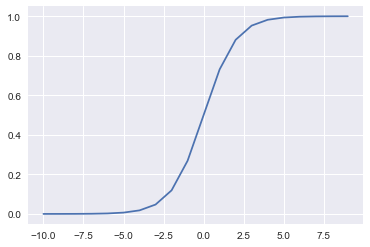

In [17]:
x=pd.Series(list(range(-10,10)))
y=x.apply(sigmoid_func)
plt.plot(x,y)

In [4]:
lm = LogisticRegression() ## *** previously used linear regression as the estimator *** 

df = pd.read_csv('C:/Users/BeckyC/Desktop/Data Science - GA files/collegeadmissions.csv')

In [5]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
df = df.join(pd.get_dummies(df['rank']))

In [7]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [31]:
print(lm.fit(df[['gre', 'gpa', 1, 2,3]], df['admit']))# dropped rank 4 
## output of model; 
# C is the 1/Alpha

print (lm.coef_)
print (lm.intercept_)
print (df.admit.mean()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[  1.63913356e-03   4.33354702e-04   1.15220976e+00   5.14395667e-01
   -3.62326169e-02]]
[-2.09315184]
0.3175


In [33]:
print(np.exp(lm.coef_))
# You can see that the coefficients for ranks 1 - 3 deteriorates, 
#as we know that rank 1 is more likely to result in admit than rank 2 or 3  

[[ 1.00164048  1.00043345  3.16517946  1.67262737  0.96441593]]


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [28]:
from sklearn.metrics import (roc_curve, roc_auc_score,)

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [29]:
# WE DIDNT USE THIS IN THE CLASS 

actuals = lm.predict(df_final) 
probas = lm.predict_proba(df_final)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

NameError: name 'feature_set' is not defined

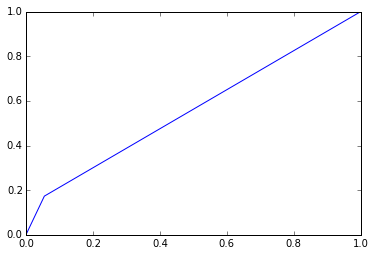

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [2]:
df_titanic = pd.read_csv('C:/Users/BeckyC/Desktop/Data Science - GA files/titanic.csv')
df_titanic.head() 
#pd.get_dummies(df_titanic['pclass']) 


#build logistic regression model using best features
# gridsearch C & class_weight to apply cross validation 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
##identifying any nulls in the data 
df_titanic.isnull().describe()
#pd.impute - use this to fill blanks, I'll specify the mean etc to compute 

# but for this dataset I am going to drop the columns which have nulls and a few others that I don't think will be predictive.
cols_to_keep =['Survived','Pclass','Sex','SibSp']
df_Model = df_titanic[cols_to_keep]
df_Model.head()

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0


,Survived,Pclass,SibSp
Survived,1.000000,-0.338481,-0.035322
Pclass,-0.338481,1.000000,0.083081
SibSp,-0.035322,0.083081,1.000000


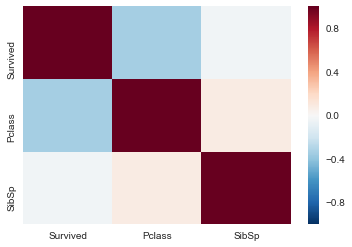

In [53]:
#predict survival 
sns.heatmap(df_Model.corr())
df_Model.corr() # nb categorical variables won't appear in correlation matrix, so need to create dummies.

In [4]:
pclass = pd.get_dummies(df_Model.Pclass)
pclass.columns = ['pclass_' + str(i) for i in pclass.columns]

sex = pd.get_dummies(df_Model.Sex)
sex.columns = ['sex_' + str(i) for i in sex.columns]


sib = pd.get_dummies(df_Model.SibSp) # sib_1 to 8 
sib.columns = ['sib_' + str(i) for i in sib.columns]

df_Model = df_Model.join(pclass)
df_Model = df_Model.join(sex)
df_Model = df_Model.join(sib)



In [5]:
df_Model.head()
columns_to_keep = ['Survived', 'sex_male', 'sex_female', 'pclass_1', 'pclass_2', 'pclass_3','sib_8']
columns_to_keep.extend(['sib_' + str(i) for i in range(0, 6)])
df_model = df_Model[columns_to_keep]

,Survived,sex_male,sex_female,pclass_1,pclass_2,pclass_3,sib_8,sib_0,sib_1,sib_2,sib_3,sib_4,sib_5
Survived,1.000000,-0.543351,0.543351,0.285904,0.093349,-0.322308,-0.070234,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292
sex_male,-0.543351,1.000000,-1.000000,-0.098013,-0.064746,0.137143,-0.014186,0.203203,-0.179339,-0.042182,-0.094850,0.005735,0.023967
sex_female,0.543351,-1.000000,1.000000,0.098013,0.064746,-0.137143,0.014186,-0.203203,0.179339,0.042182,0.094850,-0.005735,-0.023967
pclass_1,0.285904,-0.098013,0.098013,1.000000,-0.288585,-0.626738,-0.050338,-0.058470,0.125673,-0.026838,-0.017331,-0.081228,-0.042496
pclass_2,0.093349,-0.064746,0.064746,-0.288585,1.000000,-0.565210,-0.045396,-0.033099,0.077469,0.035244,-0.048107,-0.073253,-0.038324
pclass_3,-0.322308,0.137143,-0.137143,-0.626738,-0.565210,1.000000,0.080318,0.077316,-0.171329,-0.005560,0.054084,0.129604,0.067804
sib_8,-0.070234,-0.014186,0.014186,-0.050338,-0.045396,0.080318,1.000000,-0.130431,-0.049261,-0.016029,-0.012033,-0.012778,-0.006685
sib_0,-0.115867,0.203203,-0.203203,-0.058470,-0.033099,0.077316,-0.130431,1.000000,-0.811408,-0.264017,-0.198205,-0.210469,-0.110110
sib_1,0.173076,-0.179339,0.179339,0.125673,0.077469,-0.171329,-0.049261,-0.811408,1.000000,-0.099714,-0.074858,-0.079490,-0.041586
sib_2,0.029796,-0.042182,0.042182,-0.026838,0.035244,-0.005560,-0.016029,-0.264017,-0.099714,1.000000,-0.024357,-0.025864,-0.013531


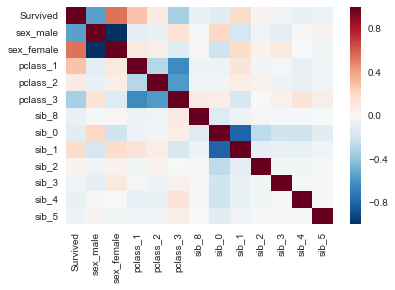

In [85]:
sns.heatmap(df_model.corr())
df_model.corr()


In [6]:
#keeping features which are correlated with survival and dropping one of the dummies.
cols_to_keep =['Survived', 'sex_male' ,'pclass_1','pclass_3','sib_0','sib_1']
df_final = df_model[cols_to_keep]
df_final.head()

,Survived,sex_male,pclass_1,pclass_3,sib_0,sib_1
0,0,1,0,1,0,1
1,1,0,1,0,0,1
2,1,0,0,1,1,0
3,1,0,1,0,0,1
4,0,1,0,1,1,0


Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: pclass_1, dtype: object

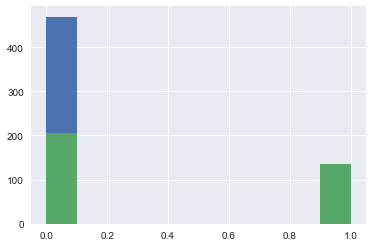

In [10]:
%matplotlib inline

df_final.groupby('Survived').pclass_1.hist()

In [ ]:
print(lm.fit(df_final[['sex_male', 'pclass_1', 'pclass_3','sib_0','sib_1']], df_final['Survived']))
## output of model; 
# C is the 1/Alpha

print (lm.coef_)
print (lm.intercept_)
print (df_final.Survived.mean()) 
lm.predict(df_final[['sex_male', 'pclass_1', 'pclass_3','sib_0','sib_1']]) # this makes a prediction based on the AUC = 0.7

#Can I add lm.predict result into a new column of my dataframe?

In [92]:
df_model.head()


,Survived,sex_male,sex_female,pclass_1,pclass_2,pclass_3,sib_8,sib_0,sib_1,sib_2,sib_3,sib_4,sib_5
0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,0,1,1,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,0,0,0
3,1,0,1,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,0,0,0


In [98]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [13]:
#Trying to use grid search to test different C values and class_weights 

from sklearn import grid_search, cross_validation
import numpy as np

feature_set = df_final[['sex_male', 'pclass_1', 'pclass_3','sib_0','sib_1']]

c = np.logspace(-10, 10, 21)
cw = [None,'balanced'] #Class_weightwe'll talk about these later 

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': c,'class_weight': cw},
    cv=cross_validation.KFold(n=len(df_model),n_folds=5),
    scoring='roc_auc')

gs.fit(feature_set, df_final['Survived'])


#Check solution code for the right outputs to print 
print (-gs.best_score_) # returns AUC 
print (gs.best_estimator_ )# I only used one estimator
for row in gs.grid_scores_: # returns params and statistics for all combinations 
    print (row)

-0.8383943923979269
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
mean: 0.82335, std: 0.01765, params: {'C': 1e-10, 'class_weight': None}
mean: 0.81376, std: 0.03118, params: {'C': 1e-10, 'class_weight': 'balanced'}
mean: 0.82335, std: 0.01765, params: {'C': 1.0000000000000001e-09, 'class_weight': None}
mean: 0.81376, std: 0.03118, params: {'C': 1.0000000000000001e-09, 'class_weight': 'balanced'}
mean: 0.82335, std: 0.01765, params: {'C': 1e-08, 'class_weight': None}
mean: 0.81376, std: 0.03118, params: {'C': 1e-08, 'class_weight': 'balanced'}
mean: 0.82335, std: 0.01765, params: {'C': 9.9999999999999995e-08, 'class_weight': None}
mean: 0.81376, std: 0.03118, params: {'C': 9.9999999999999995e-08, 'class_weight': 'balanced'}
mean: 0.82335, std: 0.01765, params: {'C': 9.99

Interpetation:  
The mean is returning the mean ROC_AUC. It is the mean of each of the kfolds.
The best score is the one which has the largest AUC, which is where c=1 and class_weight = None, then AUC = 0.838

In [1]:
# This creates a yes/no flag for siblings 
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

# WE DIDNT USE THIS IN THE CLASS 
#But this should be the right syntax to produce a ROC plot.
#roc_curve function returns fpr, tpr and threshold (typically defaults to 0.5)
# So the X axis picks up the first column [0] which is FPR.
# The y axis picks up the second column [1] which is TPR.

actuals = lm.predict(df_final) 
probas = lm.predict_proba(df_final)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

#using predict function you will get a lower AUC, compared to using the probability.  That is because the prediction  
#will use a default 0.5 threshold, whilst the probability is the unclassified prediction.

NameError: name 'titanic' is not defined